In [1]:
#%pip install pydeseq2

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# Load the Meta cells generated before

In [4]:
SEACell_ad = sc.read('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/ad_seacell_wlabels/ad_seacell_wlabels.h5ad')

In [7]:
SEACell_ad = SEACell_ad[SEACell_ad.obs['Purity']>0.7]

In [8]:
SEACell_ad

View of AnnData object with n_obs × n_vars = 250 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    layers: 'raw'

In [9]:
SEACell_ad.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2780022 stored elements and shape (250, 13893)>

In [10]:
print(SEACell_ad.X[:5, :5].toarray())

[[ 49.   5.  10.   2.  70.]
 [ 50.   5.   9.   0.  65.]
 [ 54.   5.  16.   3. 138.]
 [  0.   1.   2.   0.   3.]
 [ 54.   4.  13.   0.  94.]]


# DESeq 

In [14]:
#%pip install sanbomics

In [15]:
from sanbomics.plots import volcano

In [16]:
SEACell_ad.obs['Cell_type'].unique()

['Superbasal', 'Goblet cells', 'Club cells', 'Ciliated cells', 'Unk3', 'Basal cells', 'Undetermined serous cells', 'Unk2', 'Ionocytes', 'Unk1']
Categories (10, object): ['Basal cells', 'Ciliated cells', 'Club cells', 'Goblet cells', ..., 'Undetermined serous cells', 'Unk1', 'Unk2', 'Unk3']

# All the graphes

In [17]:
cell_type = ['Superbasal', 'Club cells', 'Goblet cells', 'Ciliated cells','Undetermined serous cells', 'Basal cells']

C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.

C:\Users\MDV\anaconda3\envs\annot\Lib\site-packages\joblib\externals\loky\process_executor.py:1076: UserWarning: On Windows, max_workers cannot exceed 61 due to limitations of the operating system.
  warnings.warn(


Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 4.36 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 2.25 seconds.

Fitting LFCs...
... done in 2.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 40 outlier genes.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Running Wald tests...
... done in 2.50 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    36.684448        0.464046  0.215196  2.156384  0.031054  0.286526
KLHL17    2.884880       -0.290919  0.436320 -0.666756  0.504928  0.804222
PLEKHN1  24.316111        0.213293  0.434291  0.491130  0.623335  0.864317
PERM1     0.100417        0.047068  3.188549  0.014762  0.988222       NaN
HES4     50.836552        0.603754  0.184461  3.273069  0.001064  0.053127
...            ...             ...       ...       ...       ...       ...
EGFP      0.134494        0.889801  2.553752  0.348429  0.727518       NaN
REPLI     0.390682        2.235321  1.899337  1.176896  0.239237       NaN
GLYCO     0.330742        1.968124  1.888265  1.042292  0.297276       NaN
MEMB      0.713102        3.121219  1.298277  2.404124  0.016211       NaN
NUCL      0.947130        3.223904  1.091374  2.953986  0.003137       NaN

[13893 rows x 6 columns]
None


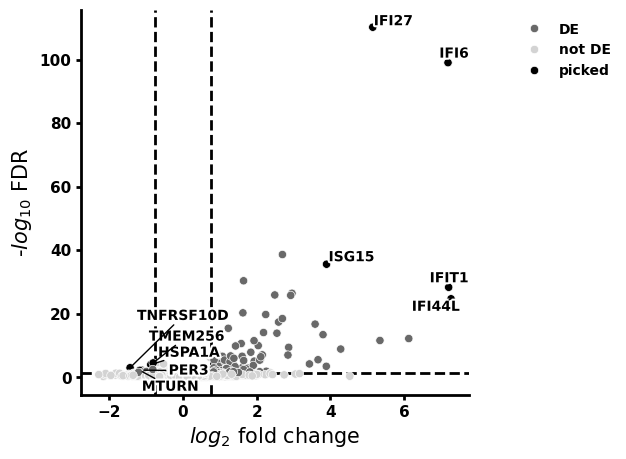

Volcano plot of the cell type: Superbasal and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.31 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 2.24 seconds.

Fitting LFCs...
... done in 2.53 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 139 outlier genes.

Fitting dispersions...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 0.21 seconds.

Fitting LFCs...
... done in 0.15 seconds.

Running Wald tests...
... done in 2.64 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    19.158509        0.205437  0.199016  1.032264  0.301948  0.639312
KLHL17    2.384185        0.605889  0.381290  1.589052  0.112049       NaN
PLEKHN1  15.935672       -0.139354  0.492223 -0.283111  0.777092  0.918637
PERM1     0.076756       -0.541160  2.716787 -0.199191  0.842113       NaN
HES4     26.040759        0.284113  0.203573  1.395633  0.162825  0.497020
...            ...             ...       ...       ...       ...       ...
EGFP      0.066174        0.004910  2.797741  0.001755  0.998600       NaN
REPLI     0.285597        1.025445  1.416832  0.723760  0.469213       NaN
GLYCO     0.156419        0.401443  1.788261  0.224488  0.822378       NaN
MEMB      0.456113        1.350607  1.033241  1.307156  0.191160       NaN
NUCL      0.434375        1.096437  0.904604  1.212064  0.225488       NaN

[13893 rows x 6 columns]
None


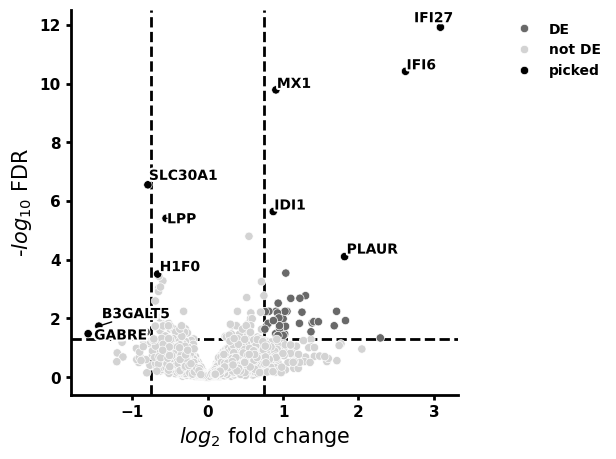

Volcano plot of the cell type: Superbasal and dpi: J6


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.03 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.20 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 2.23 seconds.

Fitting LFCs...
... done in 2.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 2 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    30.484128        0.276301  0.179833  1.536430  0.124433  0.413773
KLHL17    4.575940       -0.086342  0.430363 -0.200625  0.840992  0.951032
PLEKHN1   7.298062        0.622324  0.358102  1.737841  0.082239  0.335201
PERM1     0.492276        0.672499  1.333772  0.504208  0.614115       NaN
HES4     70.343261        0.341473  0.174845  1.953010  0.050818  0.256770
...            ...             ...       ...       ...       ...       ...
EGFP      1.932944        3.874708  1.627782  2.380361  0.017296       NaN
REPLI     3.557408        4.773219  1.486737  3.210533  0.001325  0.020478
GLYCO     3.430909        4.692082  1.528154  3.070426  0.002138  0.029667
MEMB      6.520683        4.637670  1.103927  4.201065  0.000027  0.000991
NUCL      5.489167        5.375097  1.424939  3.772159  0.000162  0.004124

[13893 rows x 6 columns]
None
0s encounter

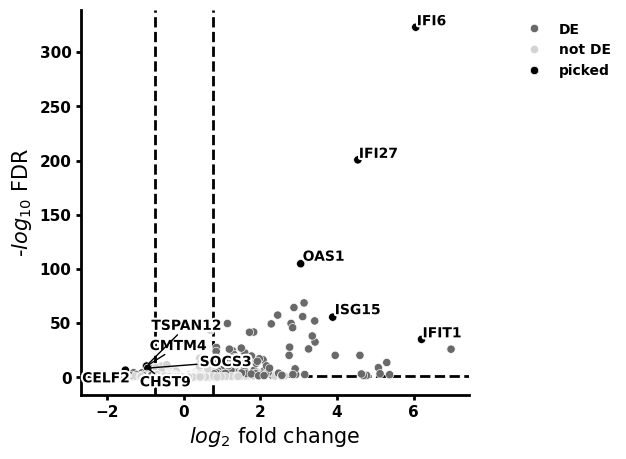

Volcano plot of the cell type: Club cells and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.25 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 2.16 seconds.

Fitting LFCs...
... done in 1.91 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.64 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    19.303689       -0.103325  0.315740 -0.327247  0.743481       NaN
KLHL17    3.093218        0.341698  0.696788  0.490390  0.623858       NaN
PLEKHN1   3.652541        1.195329  0.623553  1.916963  0.055243       NaN
PERM1     0.410191       -0.977074  2.145747 -0.455354  0.648855       NaN
HES4     32.992170        0.382997  0.292899  1.307608  0.191006  0.999555
...            ...             ...       ...       ...       ...       ...
EGFP      0.200453        1.220358  2.837584  0.430069  0.667145       NaN
REPLI     0.158942        1.199184  3.013872  0.397888  0.690713       NaN
GLYCO     0.296405        1.915801  2.542368  0.753550  0.451120       NaN
MEMB      0.304616        2.041586  2.500347  0.816521  0.414202       NaN
NUCL      0.402523        2.439522  2.073964  1.176261  0.239491       NaN

[13893 rows x 6 columns]
None


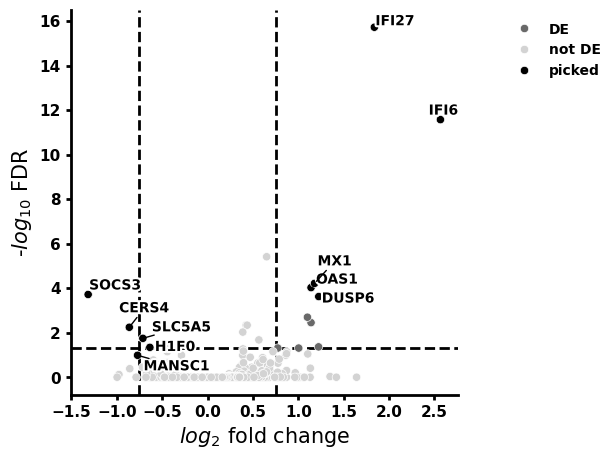

Volcano plot of the cell type: Club cells and dpi: J6


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.30 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 2.27 seconds.

Fitting LFCs...
... done in 2.23 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 12 outlier genes.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 2.66 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    24.093800        0.024445  0.196125  0.124638  0.900810  0.966510
KLHL17    2.839423       -0.118098  0.433756 -0.272269  0.785415  0.925149
PLEKHN1   6.086149        0.241636  0.329100  0.734234  0.462806  0.749022
PERM1     0.633838       -1.573283  1.088515 -1.445348  0.148360       NaN
HES4     46.450073       -0.135305  0.201522 -0.671414  0.501957  0.773650
...            ...             ...       ...       ...       ...       ...
EGFP      0.776173        3.079486  1.361925  2.261129  0.023751       NaN
REPLI     1.584292        4.070626  1.425622  2.855334  0.004299  0.045891
GLYCO     1.277453        3.734304  1.273951  2.931277  0.003376  0.038836
MEMB      2.822280        4.529890  0.994458  4.555135  0.000005  0.000229
NUCL      2.964220        4.319853  1.003111  4.306456  0.000017  0.000601

[13893 rows x 6 columns]
None


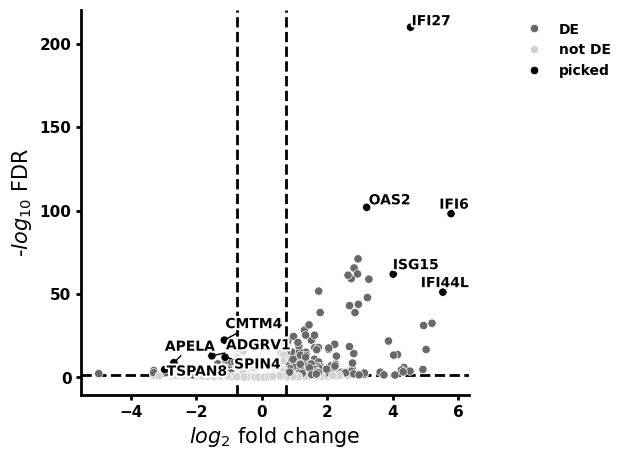

Volcano plot of the cell type: Goblet cells and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.26 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 2.36 seconds.

Fitting LFCs...
... done in 2.30 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 12 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 2.54 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    15.112009       -0.009999  0.135684 -0.073696  0.941252  0.978945
KLHL17    2.353821        0.064408  0.299643  0.214948  0.829808       NaN
PLEKHN1   3.482306       -0.002692  0.256868 -0.010478  0.991640  0.996390
PERM1     0.464244        0.326178  0.728522  0.447726  0.654351       NaN
HES4     25.880709        0.164488  0.150830  1.090551  0.275470  0.577728
...            ...             ...       ...       ...       ...       ...
EGFP      0.476036        2.168141  1.100389  1.970340  0.048799       NaN
REPLI     1.013808        3.476848  1.181137  2.943646  0.003244       NaN
GLYCO     0.333738        1.669940  1.128938  1.479213  0.139083       NaN
MEMB      1.162679        3.694476  1.077661  3.428234  0.000608       NaN
NUCL      0.636466        2.626524  1.428814  1.838255  0.066025       NaN

[13893 rows x 6 columns]
None


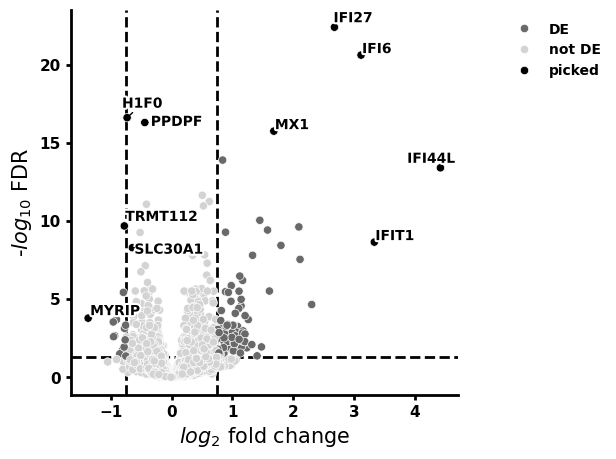

Volcano plot of the cell type: Goblet cells and dpi: J6


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.98 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 1.97 seconds.

Fitting LFCs...
... done in 1.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 15 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 2.57 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    4.824846        0.092094  0.302445  0.304498  0.760748  0.998515
KLHL17   0.501936        1.016765  0.985212  1.032027  0.302059       NaN
PLEKHN1  1.077153        0.659764  0.895633  0.736645  0.461338  0.998515
PERM1    0.061990        0.101709  3.226453  0.031523  0.974852       NaN
HES4     1.602165        0.235896  0.524295  0.449931  0.652760  0.998515
...           ...             ...       ...       ...       ...       ...
EGFP     0.352052        1.374088  3.138336  0.437840  0.661503       NaN
REPLI    0.380287        1.606372  1.843470  0.871385  0.383544       NaN
GLYCO    0.298864        1.746345  1.831479  0.953516  0.340328       NaN
MEMB     0.454331        2.506045  1.434590  1.746871  0.080660       NaN
NUCL     0.808706        3.267368  1.245165  2.624045  0.008689  0.465076

[13893 rows x 6 columns]
None


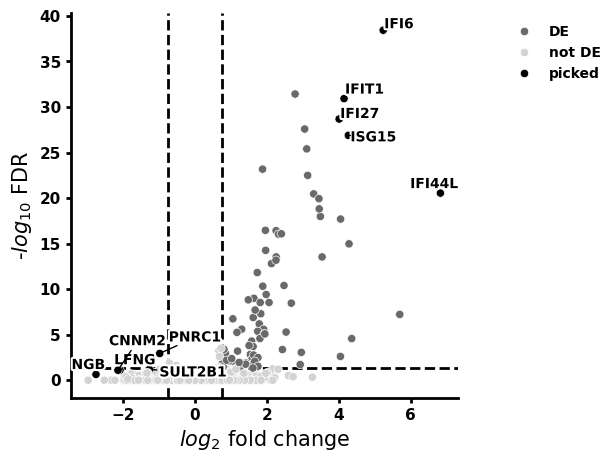

Volcano plot of the cell type: Ciliated cells and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.85 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 2.09 seconds.

Fitting LFCs...
... done in 1.94 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 7 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 2.68 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    7.301965        0.260885  0.360022  0.724635  0.468676  0.947471
KLHL17   0.904675       -0.437254  0.927612 -0.471376  0.637372       NaN
PLEKHN1  2.149712       -1.659863  0.975337 -1.701834  0.088786       NaN
PERM1    0.081953        0.837431  3.352263  0.249811  0.802734       NaN
HES4     2.958897       -0.609867  0.726537 -0.839416  0.401236       NaN
...           ...             ...       ...       ...       ...       ...
EGFP     0.030128        0.064563  3.340000  0.019330  0.984578       NaN
REPLI    0.146359        1.199471  3.315121  0.361818  0.717488       NaN
GLYCO    0.000000             NaN       NaN       NaN       NaN       NaN
MEMB     0.000000             NaN       NaN       NaN       NaN       NaN
NUCL     0.099312        0.425234  3.292634  0.129147  0.897241       NaN

[13893 rows x 6 columns]
None


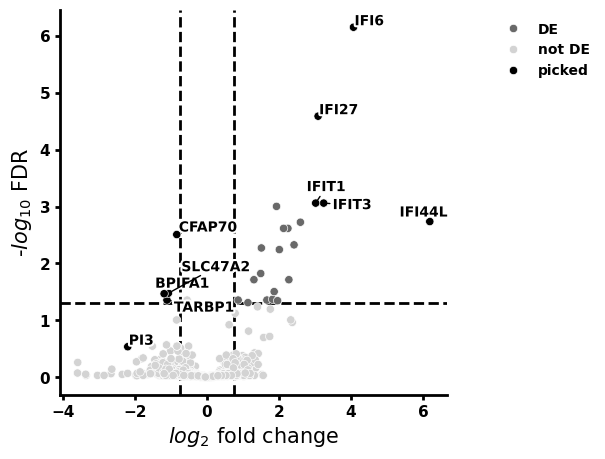

Volcano plot of the cell type: Ciliated cells and dpi: J6


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 3.11 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 2.94 seconds.

Fitting LFCs...
... done in 3.13 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.62 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange      lfcSE      stat    pvalue      padj
NOC2L    10.911100        0.649608   0.553129  1.174424  0.240225       NaN
KLHL17    1.056920        0.161082   1.622867  0.099258  0.920934       NaN
PLEKHN1   6.672033        1.089985   0.719334  1.515269  0.129704       NaN
PERM1     0.238099       -1.854925   3.694488 -0.502079  0.615612       NaN
HES4     19.829939        0.729996   0.504085  1.448160  0.147572  0.999358
...            ...             ...        ...       ...       ...       ...
EGFP     27.839363        7.000034   3.939162  1.777036       NaN       NaN
REPLI    35.207547        7.222832   3.178866  2.272141       NaN       NaN
GLYCO    34.996274        7.211937   3.684883  1.957169       NaN       NaN
MEMB     51.467022       12.816932  10.745395  1.192784       NaN       NaN
NUCL     66.851806        8.146250   3.744659  2.175432       NaN       NaN

[13893 rows x 6 columns]
None


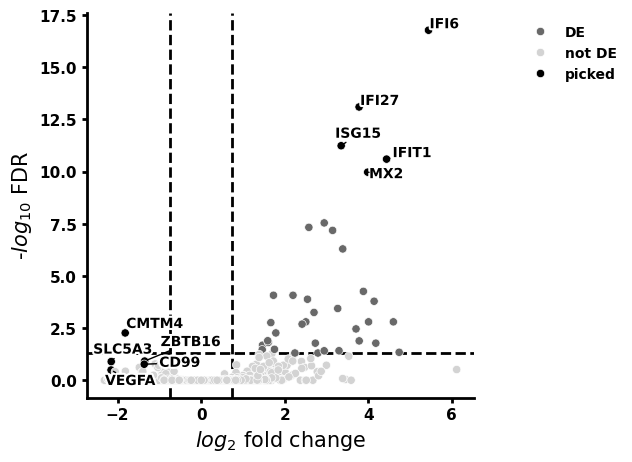

Volcano plot of the cell type: Undetermined serous cells and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.00 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.75 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 2.78 seconds.

Fitting LFCs...
... done in 3.02 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.55 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    12.570602        0.010599  0.436423  0.024286  0.980625  0.999941
KLHL17    2.267205        0.366272  0.827211  0.442780  0.657925       NaN
PLEKHN1   7.275928        0.510716  0.550331  0.928016  0.353399  0.999941
PERM1     0.000000             NaN       NaN       NaN       NaN       NaN
HES4     11.925694        0.351297  0.450005  0.780650  0.435008  0.999941
...            ...             ...       ...       ...       ...       ...
EGFP      1.582760        3.798972  3.511932  1.081733  0.279371       NaN
REPLI     2.250663        4.305955  3.506439  1.228013  0.219442       NaN
GLYCO     2.023624        3.350776  3.073455  1.090231  0.275611       NaN
MEMB      2.387090        4.391442  3.505688  1.252662  0.210329       NaN
NUCL      4.138951        5.186039  2.631946  1.970420  0.048790       NaN

[13893 rows x 6 columns]
None


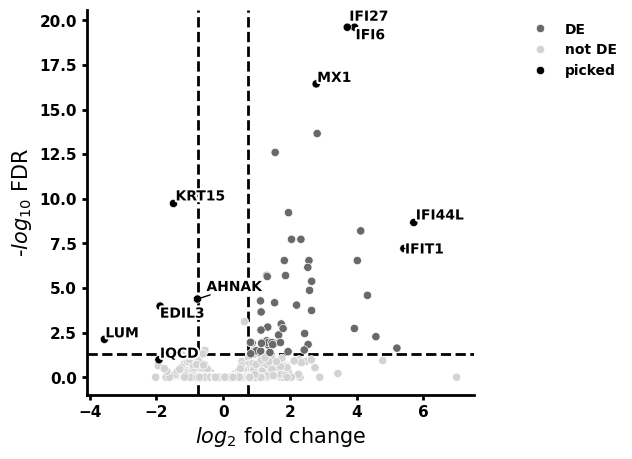

Volcano plot of the cell type: Undetermined serous cells and dpi: J6


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.85 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 2.87 seconds.

Fitting LFCs...
... done in 3.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 63 outlier genes.

Fitting dispersions...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.07 seconds.

Fitting LFCs...
... done in 0.07 seconds.

Running Wald tests...
... done in 2.66 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    8.866619        0.299282  0.265989  1.125170  0.260517  0.999752
KLHL17   0.770428        0.942399  1.173328  0.803185  0.421868       NaN
PLEKHN1  2.503807        0.327503  0.563144  0.581563  0.560861  0.999752
PERM1    0.000000             NaN       NaN       NaN       NaN       NaN
HES4     2.509847       -0.186344  0.790662 -0.235681  0.813680  0.999752
...           ...             ...       ...       ...       ...       ...
EGFP     0.030063        0.330184  3.254775  0.101446  0.919196       NaN
REPLI    0.090190        0.812331  3.216190  0.252576  0.800596       NaN
GLYCO    0.271850        1.653915  1.908974  0.866389  0.386277       NaN
MEMB     0.259232        1.270070  1.888731  0.672446  0.501300       NaN
NUCL     0.312775        0.662704  1.610694  0.411440  0.680750       NaN

[13893 rows x 6 columns]
None


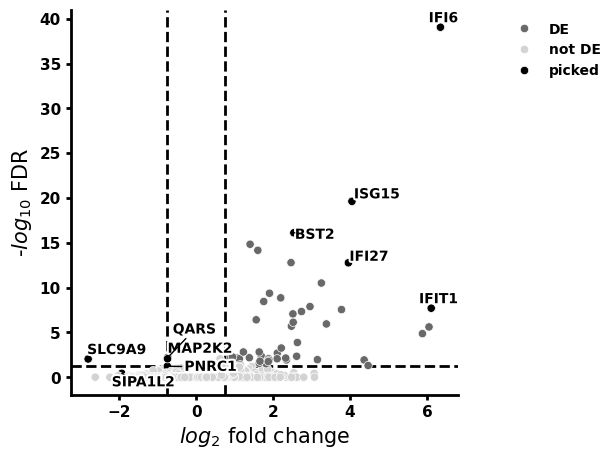

Volcano plot of the cell type: Basal cells and dpi: J3


C:\Users\MDV\AppData\Local\Temp\ipykernel_46664\3859081819.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.76 seconds.

Fitting dispersion trend curve...
... done in 0.20 seconds.

Fitting MAP dispersions...
... done in 2.74 seconds.

Fitting LFCs...
... done in 2.86 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 97 outlier genes.

Fitting dispersions...
... done in 0.12 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 2.54 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    3.375289       -0.177755  0.549604 -0.323424  0.746374  0.999788
KLHL17   0.847112        1.311466  1.198010  1.094704  0.273647  0.999788
PLEKHN1  1.872133        0.003885  0.746223  0.005206  0.995846  0.999788
PERM1    0.000000             NaN       NaN       NaN       NaN       NaN
HES4     1.787624       -1.907309  1.024682 -1.861367  0.062692  0.999788
...           ...             ...       ...       ...       ...       ...
EGFP     0.156237        0.829789  3.076491  0.269719  0.787376  0.999788
REPLI    0.207240        0.830122  3.261150  0.254549  0.799072  0.999788
GLYCO    0.103620        0.446059  3.301808  0.135095  0.892536  0.999788
MEMB     0.932580        3.503452  3.140246  1.115662  0.264567  0.999788
NUCL     0.207240        0.830122  3.261150  0.254549  0.799072  0.999788

[13893 rows x 6 columns]
None


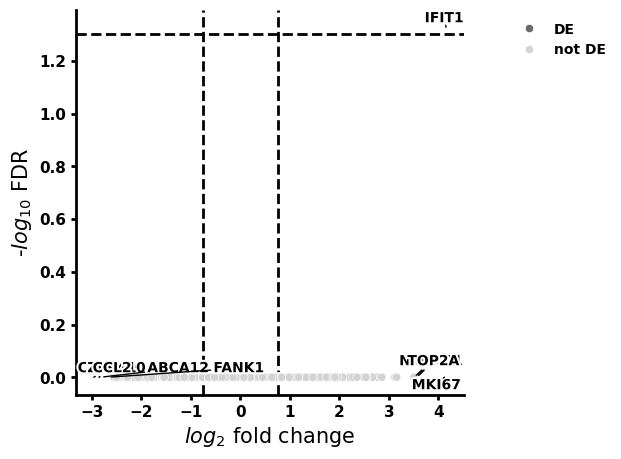

Volcano plot of the cell type: Basal cells and dpi: J6


In [18]:
Deseq2_analysis = {}
for _ in cell_type:
    for i in SEACell_ad.obs['dpi'].unique():
        
        SEACell_ad_subset = SEACell_ad[(SEACell_ad.obs['Cell_type'] == _) & (SEACell_ad.obs['dpi'] == i)]
        
        counts = pd.DataFrame(SEACell_ad_subset.X.toarray(), columns = SEACell_ad_subset.var_names)
        dds = DeseqDataSet(
            counts = counts,
            metadata=SEACell_ad_subset.obs,
            design_factors="sample")
        dds.deseq2()
        stat_res = DeseqStats(dds, contrast=('sample', 'Inf', 'Mock'))
        print(stat_res.summary())
        diff_expr  = stat_res.results_df
        Deseq2_analysis[f'{_}_{i}'] = diff_expr





        
        diff_expr['symbol'] = SEACell_ad.var_names
        volcano(diff_expr)
        print(f'Volcano plot of the cell type: {_} and dpi: {i}')



In [19]:
Deseq2_analysis

{'Superbasal_J3':           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
 NOC2L    36.684448        0.464046  0.215196  2.156384  0.031054  0.286526   
 KLHL17    2.884880       -0.290919  0.436320 -0.666756  0.504928  0.804222   
 PLEKHN1  24.316111        0.213293  0.434291  0.491130  0.623335  0.864317   
 PERM1     0.100417        0.047068  3.188549  0.014762  0.988222       NaN   
 HES4     50.836552        0.603754  0.184461  3.273069  0.001064  0.053127   
 ...            ...             ...       ...       ...       ...       ...   
 EGFP      0.134494        0.889801  2.553752  0.348429  0.727518       NaN   
 REPLI     0.390682        2.235321  1.899337  1.176896  0.239237       NaN   
 GLYCO     0.330742        1.968124  1.888265  1.042292  0.297276       NaN   
 MEMB      0.713102        3.121219  1.298277  2.404124  0.016211       NaN   
 NUCL      0.947130        3.223904  1.091374  2.953986  0.003137       NaN   
 
           symbol  
 NOC2L      N

In [21]:
#pip install pandas openpyxl

In [22]:
with pd.ExcelWriter('Deseq2_analysis.xlsx', engine='openpyxl') as writer:
    for nom, tableau in Deseq2_analysis.items():
        df = pd.DataFrame(tableau)
        df.to_excel(writer, sheet_name=nom, index=False)

In [23]:
fdr_threshold = 0.05
log2fc_threshold = 1
for x in Deseq2_analysis:
    Deseq2_analysis[x]['Significance'] = 'Non-significatif'
    Deseq2_analysis[x].loc[(Deseq2_analysis[x]['padj'] < fdr_threshold) & (Deseq2_analysis[x]['log2FoldChange'] > log2fc_threshold), 'Significance'] = 'Up'
    Deseq2_analysis[x].loc[(Deseq2_analysis[x]['padj'] < fdr_threshold) & (Deseq2_analysis[x]['log2FoldChange'] < -log2fc_threshold), 'Significance'] = 'Down'

    Deseq2_analysis[x]['negLogP'] = -np.log10(Deseq2_analysis[x]['padj'])
    

C:\Users\MDV\anaconda3\envs\annot\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


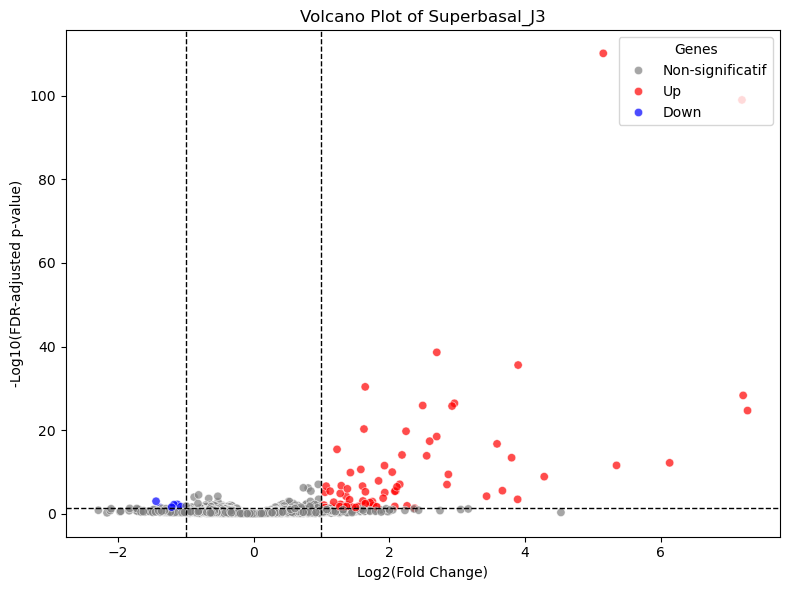

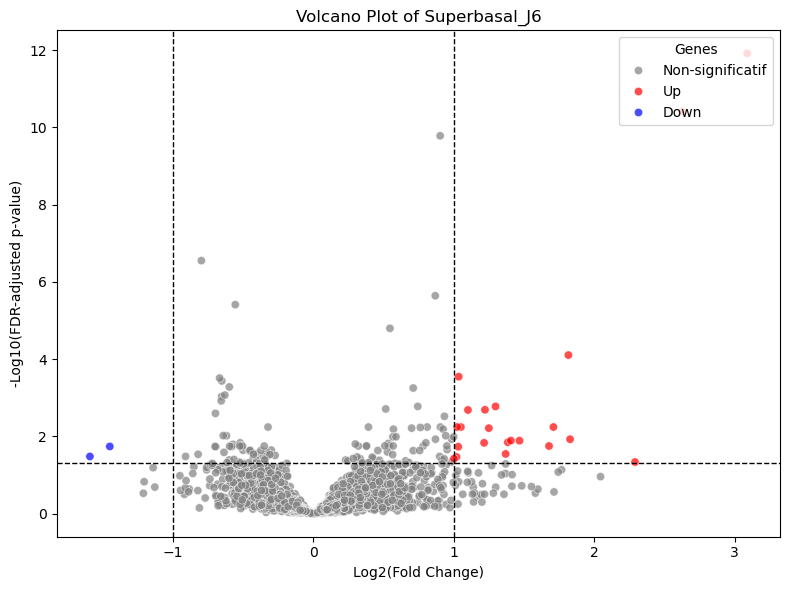

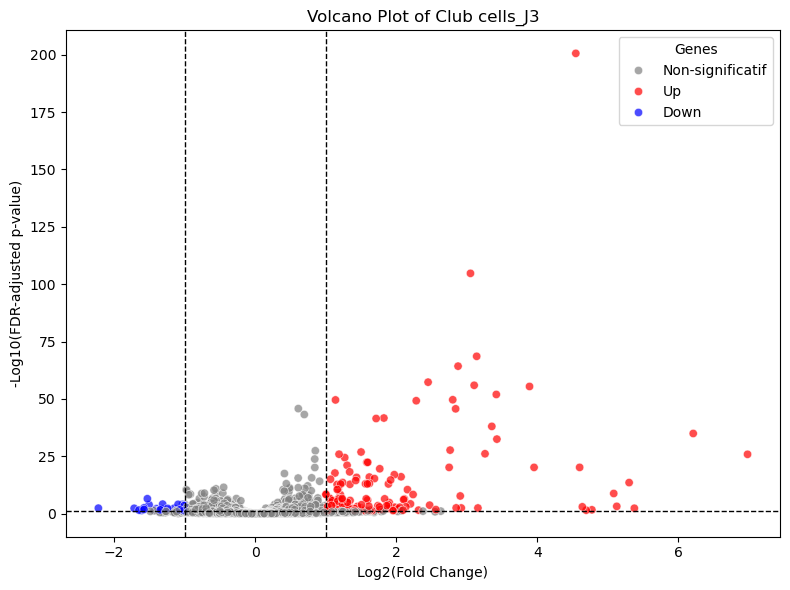

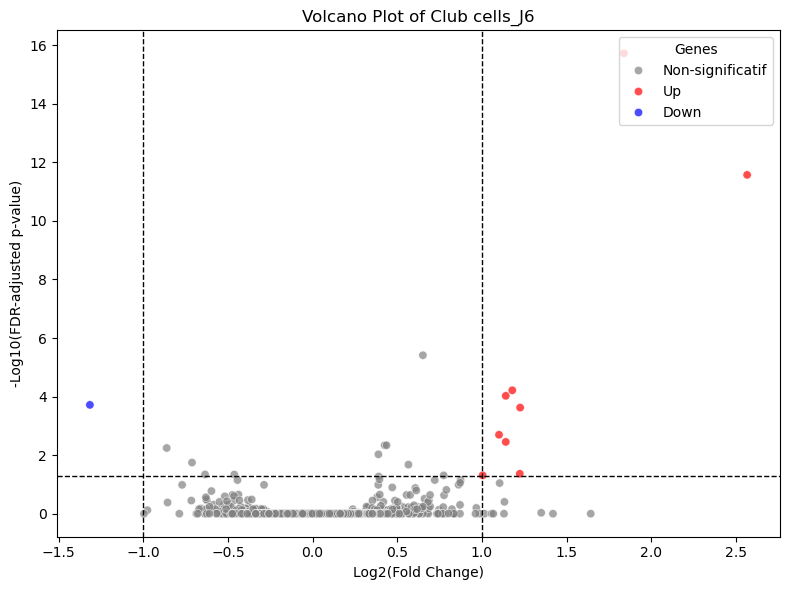

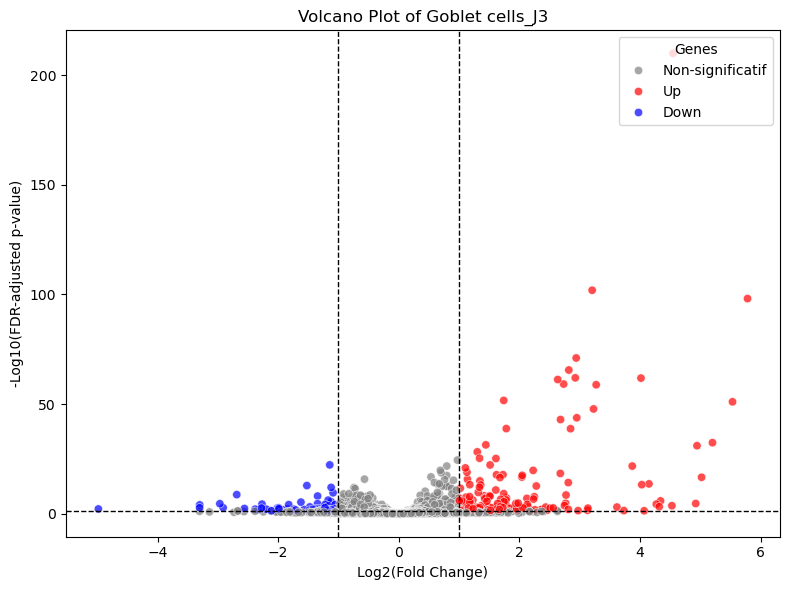

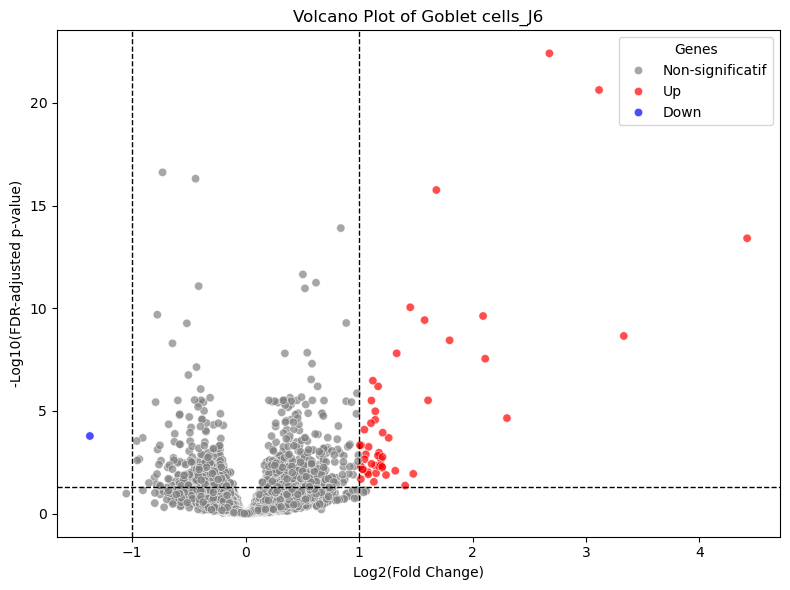

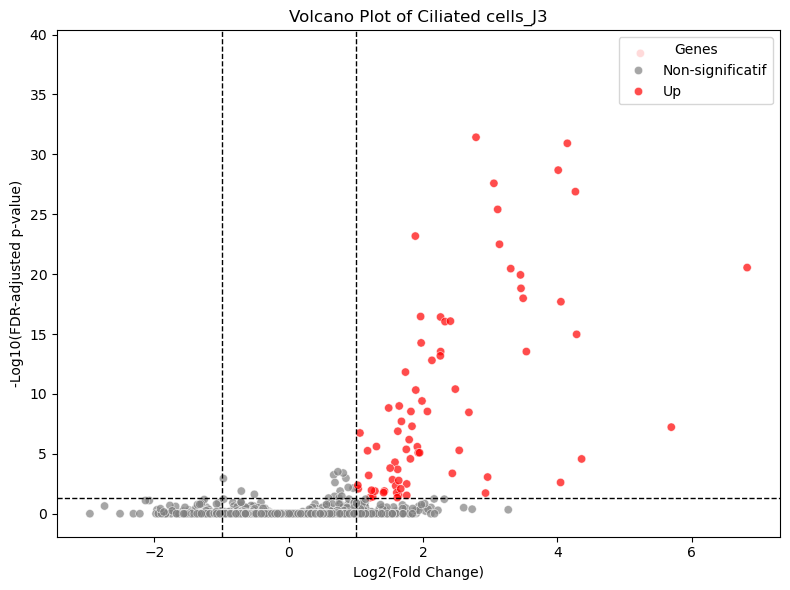

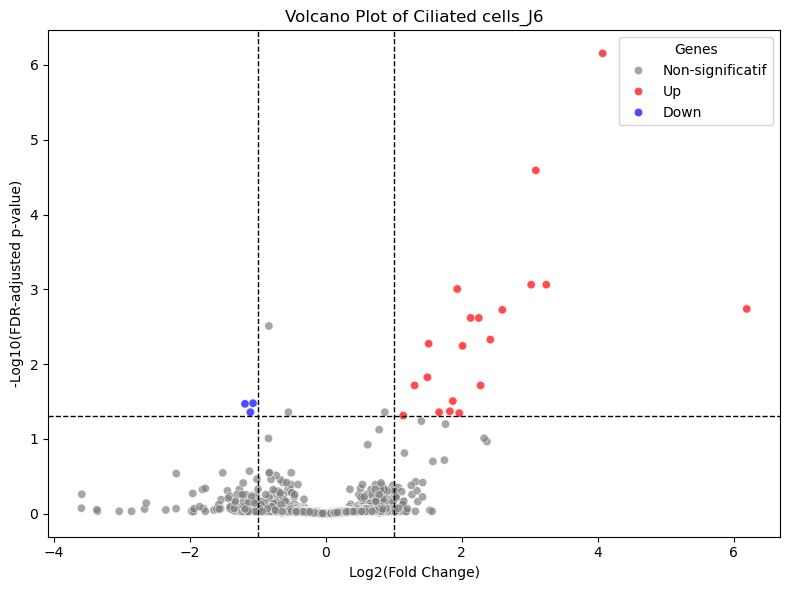

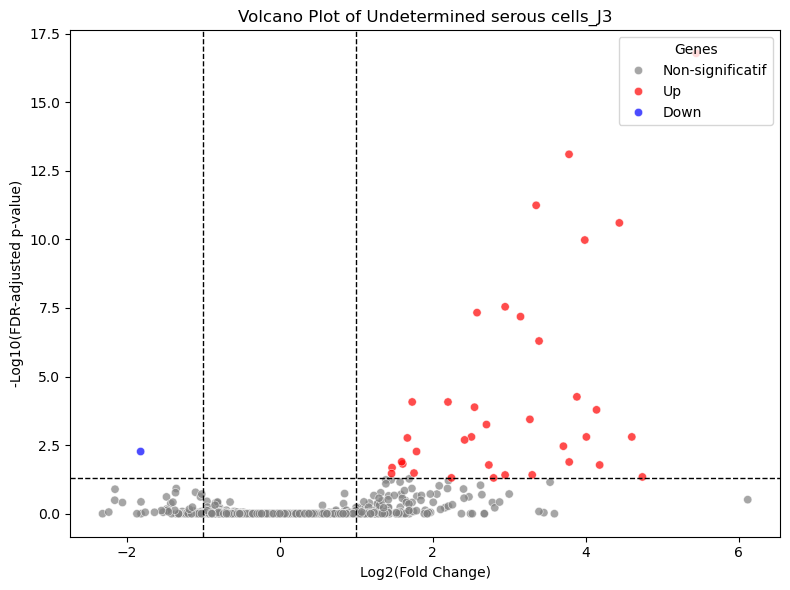

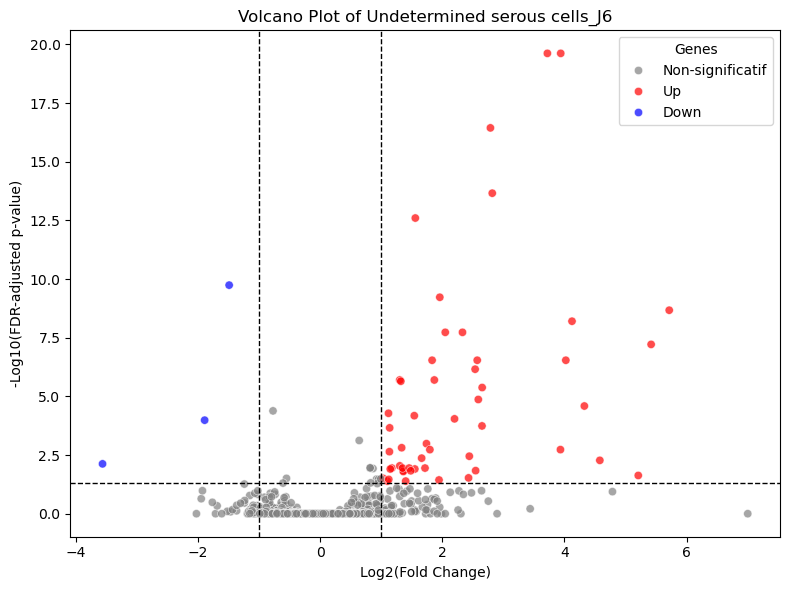

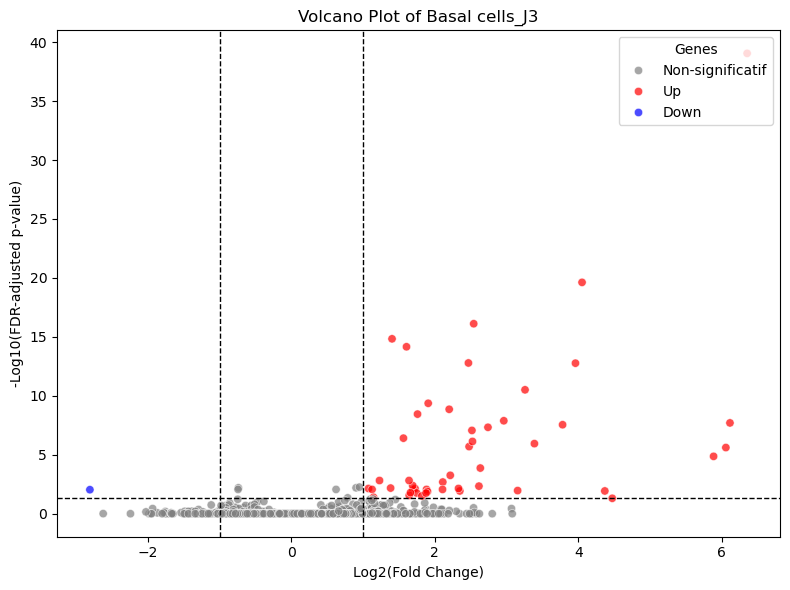

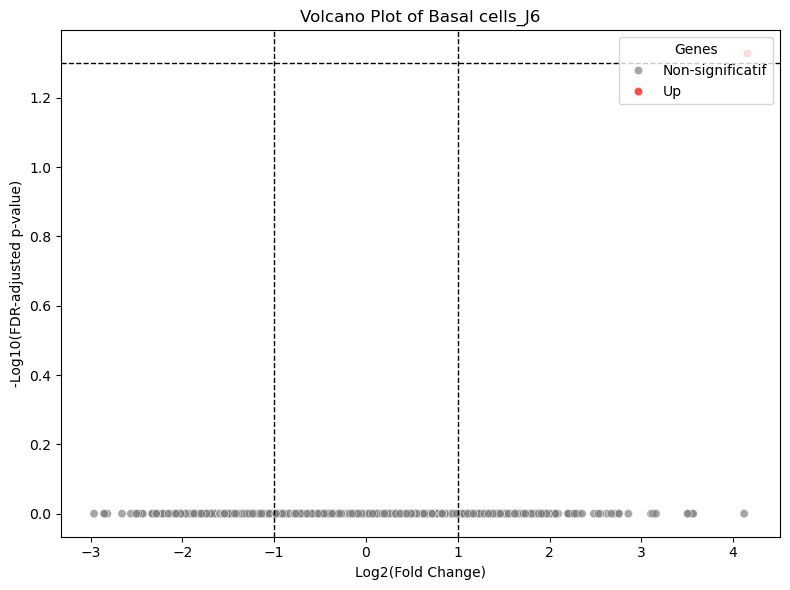

In [24]:
colors = {'Up': 'red', 'Down': 'blue', 'Non-significatif': 'gray'}
for x in Deseq2_analysis:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=Deseq2_analysis[x], x="log2FoldChange", y="negLogP", hue="Significance", palette=colors, alpha=0.7)

    # Add limit lines
    plt.axhline(-np.log10(fdr_threshold), linestyle='dashed', color='black', linewidth=1)  # FDR Limit
    plt.axvline(-log2fc_threshold, linestyle='dashed', color='black', linewidth=1) 
    plt.axvline(log2fc_threshold, linestyle='dashed', color='black', linewidth=1)


    plt.xlabel("Log2(Fold Change)")
    plt.ylabel("-Log10(FDR-adjusted p-value)")
    plt.title(f"Volcano Plot of {x}")


    plt.legend(title="Genes", loc="upper right", bbox_to_anchor=(1, 1))
    plt.tight_layout()


plt.show()

In [29]:
with pd.ExcelWriter('Deseq2_analysis_significatif_genes.xlsx', engine='openpyxl') as writer:
    for nom, tableau in Deseq2_analysis.items():
        df = pd.DataFrame(tableau[tableau['Significance'] != 'Non-significatif'])
        df.to_excel(writer, sheet_name=nom, index=False)

In [ ]:
#base for customized volcano plot based on what is necessary

plt.figure(figsize = (6,6))

ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['nobody_cares', 'picked1', 'picked2', 'i_care'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400))

ax.axhline(2, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')



texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 5 and abs(df.iloc[i].log2FoldChange) > 2:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))
        
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))





plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2)

plt.xticks(size = 12, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.xlabel("$log_{2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()

In [33]:
de.sort_values('stat', ascending = False)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFIT1,23.809372,4.142389,0.380142,10.896954,1.191809e-27,6.481056e-24
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
MX1,34.807227,2.798320,0.261726,10.691786,1.112089e-26,3.023770e-23
IFI27,146.122742,4.017119,0.379456,10.586522,3.441418e-26,7.485773e-23
...,...,...,...,...,...,...
TMSB15B-1,0.000000,NaN,NaN,NaN,NaN,NaN
TRPC5OS,0.000000,NaN,NaN,NaN,NaN,NaN
GABRQ,0.000000,NaN,NaN,NaN,NaN,NaN
PNMA6A,0.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
res = de[de.baseMean >= 10]

In [35]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
AGRN,20.234148,0.875150,0.279563,3.130416,1.745588e-03,1.385768e-01
TTLL10,36.662745,-0.040801,0.242606,-0.168180,8.664419e-01,9.984997e-01
SDF4,18.245519,-0.114702,0.182627,-0.628064,5.299623e-01,9.984997e-01
INTS11,16.406733,0.086393,0.176654,0.489053,6.248041e-01,9.984997e-01
...,...,...,...,...,...,...
MT-ND3,37.217846,-0.257732,0.288221,-0.894217,3.712059e-01,9.984997e-01
MT-ND4L,15.255727,-0.483900,0.293372,-1.649438,9.905786e-02,9.313474e-01
MT-ND4,24.778676,-0.208107,0.265649,-0.783392,4.333970e-01,9.984997e-01
MT-ND5,15.257061,-0.395507,0.265710,-1.488492,1.366213e-01,9.775610e-01


In [40]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [41]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFI44L,12.322661,6.858129,0.759314,9.032009,1.685480e-19,1.309377e-16
IFI44,17.488103,3.044024,0.336602,9.043405,1.518665e-19,1.270539e-16
GBP1,21.341797,1.551748,0.324277,4.785261,1.707651e-06,3.439336e-04
ADAR,36.208119,1.058352,0.160092,6.610898,3.819967e-11,1.154054e-08
IFI16,21.300754,0.864637,0.171916,5.029423,4.919568e-07,1.070104e-04
EIF2AK2,19.030353,1.308187,0.201871,6.480298,9.154149e-11,2.620014e-08
CFAP221,43.727204,-0.504553,0.125994,-4.004572,6.212977e-05,9.009646e-03
STAT1,23.410700,2.132155,0.259710,8.209762,2.216280e-16,1.268645e-13


In [36]:
dds

AnnData object with n_obs × n_vars = 42 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [37]:
dds.layers['normed_counts']

array([[ 0.        ,  1.65957383,  3.31914767, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.10265976,  1.65502905,  0.82751452, ...,  0.41375726,
         0.        ,  0.        ],
       [11.44652374,  0.        ,  2.86163094, ...,  2.86163094,
         2.86163094,  8.58489281],
       ...,
       [ 5.91906641,  1.3659384 ,  1.3659384 , ...,  0.        ,
         0.        ,  0.4553128 ],
       [ 6.12888052,  0.34049336,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.35226654,  1.34090662,  8.0454397 , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'].copy())

In [39]:
dds.layers['log1p']

array([[0.        , 0.9781659 , 1.46305808, ..., 0.        , 0.        ,
        0.        ],
       [2.31279873, 0.9764556 , 0.60295686, ..., 0.34625089, 0.        ,
        0.        ],
       [2.52144137, 0.        , 1.35108962, ..., 1.35108962, 1.35108962,
        2.26018819],
       ...,
       [1.93428085, 0.86117473, 0.86117473, ..., 0.        , 0.        ,
        0.37522086],
       [1.96415421, 0.29303773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.47069675, 0.8505383 , 2.20226073, ..., 0.        , 0.        ,
        0.        ]])

In [42]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 42 × 57
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks', 'log1p'

In [43]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

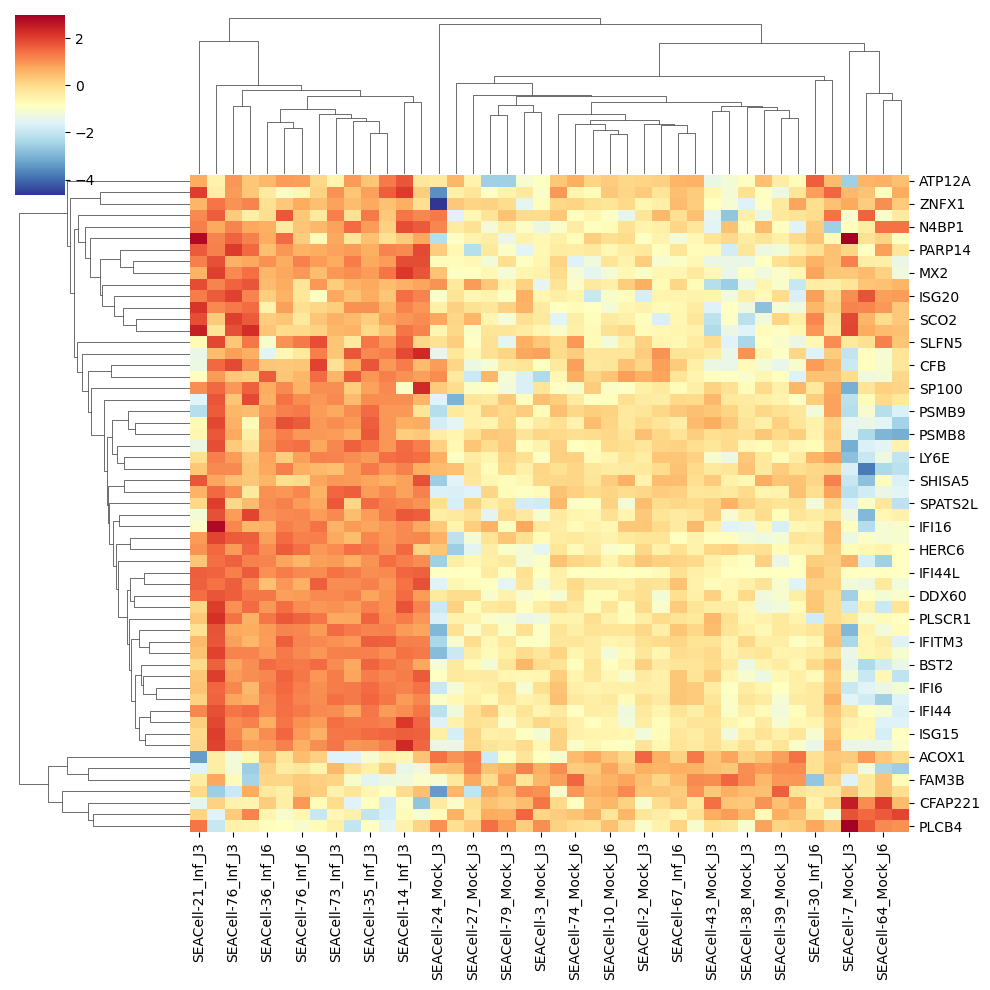

In [44]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')